# KMeans Clusteting - Olist dataset

#### This notebook proposes the following problem: in order to improve Olist Logistic, we have to find out the best 2 locations for creating new distribution centers. We are going to make use of the K-Means Clustering so as to find out clusters and their centers based on the geolocation. K-Means Clustering is a Machine Learning method that allow us particing n observation in k groups, based on the avarage. K-means algorithm identifies k number of centroids, and then allocates every data point to the nearest cluster, while keeping the centroids as small as possible.

<img src="https://miro.medium.com/max/1200/1*rw8IUza1dbffBhiA4i0GNQ.png" width="400">

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats
from sklearn.cluster import KMeans

In [2]:
#Importing the datasets
dataframeCustomer = pd.read_excel("dCustomers.xlsx")
dataframeGeo = pd.read_csv("dGeolocation.csv")
dataframeCustomer.head(5)

,customer_id,customer_zip_code_prefix,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,14409,SP
1,18955e83d337fd6b2def6b18a428ac77,9790,SP
2,4e7b3e00288586ebd08712fdd0374a03,1151,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,8775,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,13056,SP


In [3]:
#Merging both datasets with zip code as a join parameter
dataframeMerged = pd.merge(dataframeCustomer, dataframeGeo, left_on = 'customer_zip_code_prefix', 
                           right_on = 'geolocation_zip_code_prefix')
dataframeMerged.head(5)

,customer_id,customer_zip_code_prefix,customer_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,14409,SP,14409,-20.509897,-47.397866,franca,SP
1,06b8999e2fba1a1fbc88172c00ba8bc7,14409,SP,14409,-20.497396,-47.399241,franca,SP
2,06b8999e2fba1a1fbc88172c00ba8bc7,14409,SP,14409,-20.510459,-47.399553,franca,SP
3,06b8999e2fba1a1fbc88172c00ba8bc7,14409,SP,14409,-20.480940,-47.394161,franca,SP
4,06b8999e2fba1a1fbc88172c00ba8bc7,14409,SP,14409,-20.515413,-47.398194,franca,SP


In [4]:
#Removing outliers from latitude collumn using Z-score
dataframeMerged['z_score']=stats.zscore(dataframeMerged['geolocation_lat'])
filtered = dataframeMerged.loc[dataframeMerged['z_score'].abs()<=3]
dataframeMerged = filtered
dataframeMerged.head(10)

,customer_id,customer_zip_code_prefix,customer_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,z_score
0,06b8999e2fba1a1fbc88172c00ba8bc7,14409,SP,14409,-20.509897,-47.397866,franca,SP,0.335735
1,06b8999e2fba1a1fbc88172c00ba8bc7,14409,SP,14409,-20.497396,-47.399241,franca,SP,0.338642
2,06b8999e2fba1a1fbc88172c00ba8bc7,14409,SP,14409,-20.510459,-47.399553,franca,SP,0.335605
3,06b8999e2fba1a1fbc88172c00ba8bc7,14409,SP,14409,-20.480940,-47.394161,franca,SP,0.342468
4,06b8999e2fba1a1fbc88172c00ba8bc7,14409,SP,14409,-20.515413,-47.398194,franca,SP,0.334453
5,06b8999e2fba1a1fbc88172c00ba8bc7,14409,SP,14409,-20.513713,-47.396644,franca,SP,0.334848
6,06b8999e2fba1a1fbc88172c00ba8bc7,14409,SP,14409,-20.505077,-47.389698,franca,SP,0.336856
7,06b8999e2fba1a1fbc88172c00ba8bc7,14409,SP,14409,-20.493584,-47.403425,franca,SP,0.339528
8,06b8999e2fba1a1fbc88172c00ba8bc7,14409,SP,14409,-20.497904,-47.405578,franca,SP,0.338524
9,06b8999e2fba1a1fbc88172c00ba8bc7,14409,SP,14409,-20.513713,-47.396644,franca,SP,0.334848


In [5]:
#Removing outliers from longitude collumn using Z-score
dataframeMerged['z_score']=stats.zscore(dataframeMerged['geolocation_lng'])
filtered = dataframeMerged.loc[dataframeMerged['z_score'].abs()<=3]
filtered.head(20)
dataframeMerged = filtered
dataframeMerged.head(10)

,customer_id,customer_zip_code_prefix,customer_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,z_score
0,06b8999e2fba1a1fbc88172c00ba8bc7,14409,SP,14409,-20.509897,-47.397866,franca,SP,-0.407900
1,06b8999e2fba1a1fbc88172c00ba8bc7,14409,SP,14409,-20.497396,-47.399241,franca,SP,-0.408314
2,06b8999e2fba1a1fbc88172c00ba8bc7,14409,SP,14409,-20.510459,-47.399553,franca,SP,-0.408408
3,06b8999e2fba1a1fbc88172c00ba8bc7,14409,SP,14409,-20.480940,-47.394161,franca,SP,-0.406785
4,06b8999e2fba1a1fbc88172c00ba8bc7,14409,SP,14409,-20.515413,-47.398194,franca,SP,-0.407998
5,06b8999e2fba1a1fbc88172c00ba8bc7,14409,SP,14409,-20.513713,-47.396644,franca,SP,-0.407532
6,06b8999e2fba1a1fbc88172c00ba8bc7,14409,SP,14409,-20.505077,-47.389698,franca,SP,-0.405441
7,06b8999e2fba1a1fbc88172c00ba8bc7,14409,SP,14409,-20.493584,-47.403425,franca,SP,-0.409573
8,06b8999e2fba1a1fbc88172c00ba8bc7,14409,SP,14409,-20.497904,-47.405578,franca,SP,-0.410221
9,06b8999e2fba1a1fbc88172c00ba8bc7,14409,SP,14409,-20.513713,-47.396644,franca,SP,-0.407532


In [6]:
#New variable containing only latitude and longitude collums, changing data type from float to integer
geolocation = dataframeMerged[['geolocation_lat','geolocation_lng']].dropna().astype(int)
geolocation.head(5)

,geolocation_lat,geolocation_lng
0,-20,-47
1,-20,-47
2,-20,-47
3,-20,-47
4,-20,-47


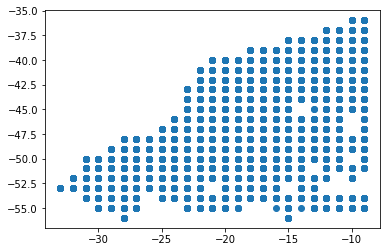

In [7]:
#Ploting data
plt.scatter(geolocation["geolocation_lat"], geolocation["geolocation_lng"])
plt.show()

In [8]:
#Training and predicting e previsão do modelo, considerando 2 clusters

km = KMeans(n_clusters = 2)
y_predict = km.fit_predict(geolocation[["geolocation_lat", "geolocation_lng"]])
geolocation["cluster"] = y_predict
geolocation.head(5)

,geolocation_lat,geolocation_lng,cluster
0,-20,-47,1
1,-20,-47,1
2,-20,-47,1
3,-20,-47,1
4,-20,-47,1


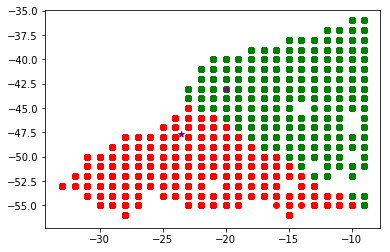

In [10]:
#Ploting data post KMeans training and predict
df1 = geolocation[geolocation.cluster == 0]
df2 = geolocation[geolocation.cluster == 1]

plt.scatter(df1.geolocation_lat,df1['geolocation_lng'],color='green')
plt.scatter(df2.geolocation_lat,df2['geolocation_lng'],color='red')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.show()

K-Means do not well defined the 2 clusters on our datas. Perhaps it occurs due to there is observations from all braziliam territory. For the futere, we should both refine the data and apply K-Means agaian and try to find out answer in other parameters such as logistic, in order to define the new distribution centers.